In [375]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(plyr))
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(scales)
library(knitr)
library(IRdisplay)
options(repr.plot.width=7, repr.plot.height=4)
isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')

# includes all paired including 3d
#paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X9.23'='*9:23', 'X10.25'='10:25', 'X10.45'='*10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X22.46'='*22:46', 'X26.44'='*26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
# filtered version of paired positions
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble', 'Paired', 'Bulge', 'Mismatched', 'Absent')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X17b'='17b', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V', 'Absent')

colors = c('A'='gray20', 'C'='gray20', 'G'='gray20', 'U'='gray20', 'Absent'='gray20', 'Purine'='gray20', 'Pyrimidine'='gray20', 'Weak'='gray20', 'Strong'='gray20', 'Amino'='gray20', 'Keto'='gray20', 'B'='gray50', 'D'='gray50', 'H'='gray50', 'V'='gray50', 'GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PurinePyrimidine'='gray20', 'PyrimidinePurine'='gray20', 'StrongPair'='gray20', 'WeakPair'='gray20', 'AminoKeto'='gray20', 'KetoAmino'='gray20', 'Wobble'='gray20', 'Paired'='gray20', 'Bulge'='gray20', 'Mismatched'='gray20')
fills = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8', 'Purine'='#ff8300', 'Pyrimidine'='#66c2a5', 'Weak'='#b3de69', 'Strong'='#fb72b2', 'Amino'='#c1764a', 'Keto'='#b26cbd', 'B'='#e5c494', 'D'='#ccebd5', 'H'='#ffa79d', 'V'='#a6cdea', 'Absent'='gray60', 'Mismatched'='gray30', 'Paired'='#ffffcc')

# simple codes for reviewer #3
simple_identities = c('A' = 'A', 'C' = 'C', 'G' = 'G', 'U' = 'U', 'Purine' = 'Purine', 'Pyrimidine' = 'Pyrimidine', 
                      'Weak' = 'A/U', 'Strong' = 'G/C', 'Amino' = 'A/C', 'Keto' = 'G/U', 
                      'B' = 'C/G/U', 'D' = 'A/G/U', 'H' = 'A/C/U', 'V' = 'A/C/G', 'Absent' = 'Absent')
colors = c(colors, 'A/U' = 'gray20', 'G/C' = 'gray20', 'A/C' ='gray20', 'G/U' = 'gray20', 'C/G/U' = 'gray50', 'A/G/U' = 'gray50', 'A/C/U' = 'gray50', 'A/C/G' = 'gray50')
fills = c(fills, 'A/U' = '#b3de69', 'G/C' = '#fb72b2', 'A/C' ='#c1764a', 'G/U' = '#b26cbd', 'C/G/U' = '#e5c494', 'A/G/U' = '#ccebd5', 'A/C/U' = '#ffa79d', 'A/C/G' = '#a6cdea')

In [2]:
identities = read.delim('identities.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)
identities = identities %>% mutate(quality=quality & !restrict)

In [3]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-specific-freqs.RData')

## Quality set stats

In [4]:
df = identities %>% group_by(isotype, clade, quality) %>% 
  summarize(count=n()) %>%
  ungroup()
df = rbind(df, cbind(expand.grid(isotype=unique(df$isotype), clade=unique(df$clade), quality=unique(df$quality)), count=0))
df %>% group_by(isotype, clade, quality) %>% 
  summarize(count=sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(rev(quality)) %>%
  summarize(count=paste0(count, collapse='/')) %>%
  spread(isotype, count)

,clade,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,⋯,Met,Phe,Pro,SeC,Ser,Sup,Thr,Trp,Tyr,Val
1,Fungi,253/526,359/519,143/275,88/441,103/100,195/241,133/442,228/627,79/138,⋯,99/145,139/274,190/329,0/3,380/491,0/0,311/396,86/137,75/231,314/476
2,Insecta,97/1648,179/232,37/137,47/208,56/84,96/121,80/251,88/322,29/103,⋯,47/78,37/133,87/219,0/1,147/3845,0/2,126/200,35/93,103/82,118/218
3,Mammalia,970/2034,859/380,281/398,151/360,579/577,350/297,464/457,514/729,76/292,⋯,275/104,226/249,219/559,0/0,683/508,0/0,669/208,234/103,301/200,563/1037
4,Nematoda,95/287,135/291,36/164,30/211,26/102,66/177,81/326,99/350,28/134,⋯,28/84,35/116,86/328,0/2,140/287,0/2,113/240,29/95,45/128,103/220
5,Spermatophyta,197/574,314/405,157/243,95/397,103/157,160/208,152/447,175/636,38/180,⋯,75/202,72/259,174/514,0/1,286/547,0/0,227/258,54/218,138/208,209/418
6,Vertebrata,306/535,371/788,185/897,72/414,178/284,216/493,277/649,250/870,85/297,⋯,139/409,176/253,184/765,0/0,413/1320,0/0,370/549,134/146,183/351,295/737


## Consensus elements by cutoff table

In [5]:
resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Absent = all(codes %in% 'Absent'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        AminoKeto = all(codes %in% c('AU', 'CG', 'AminoKeto')),
        KetoAmino = all(codes %in% c('UA', 'GC', 'KetoAmino')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

get_consensus_IDE = function(position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(codes) != 126) return("N/A") # make sure that each isotype/clade is represented
  if (length(best_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>% select_('species', 'isotype', 'quality', position) %>%
      filter_('quality') %>%
      group_by_('species', 'isotype') %>% 
      summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                 miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
      mutate(ubiquitous = match > miss)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

In [6]:
cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0)) {
  df = clade_iso_ac_freqs %>%
    group_by(isotype, clade, positions, variable) %>%
    summarize(count=sum(value), freq=sum(value)/sum(total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff=as.character(cutoff)) %>%
    select(isotype, clade, positions, variable, freq, cutoff) %>%
    group_by(isotype, clade, positions) %>%
    arrange(code_groups[variable], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}
cutoff_freqs = cutoff_freqs %>% 
  group_by(positions, cutoff) %>%
  summarize(identity = get_consensus_IDE(positions, variable)) %>%
  select(positions, cutoff, identity) %>% 
  filter(positions %in% c(names(single_positions), names(paired_positions))) %>%
  spread(cutoff, identity)

In [7]:
cutoff_freqs %>% filter(`0.5` != "N/A") %>% select(-`1`)

,positions,0.5,0.6,0.7,0.8,0.9,0.95,0.99
1,X14,A,A,A,A,A,A,N/A
2,X19,Purine,Purine,Purine,Purine,Purine,Purine,N/A
3,X21,H,H,H,H,H,H,N/A
4,X32,B,B,B,B,B,B,N/A
5,X33,Pyrimidine,Pyrimidine,Pyrimidine,Pyrimidine,Pyrimidine,Pyrimidine,N/A
6,X37,V,V,V,V,V,V,N/A
7,X38,H,H,H,H,H,H,N/A
8,X46,V,V,V,V,V,N/A,N/A
9,X54,H,H,H,H,H,H,N/A
10,X55,Pyrimidine,Pyrimidine,Pyrimidine,Pyrimidine,Pyrimidine,Pyrimidine,N/A


# Isotype-specific heatmaps

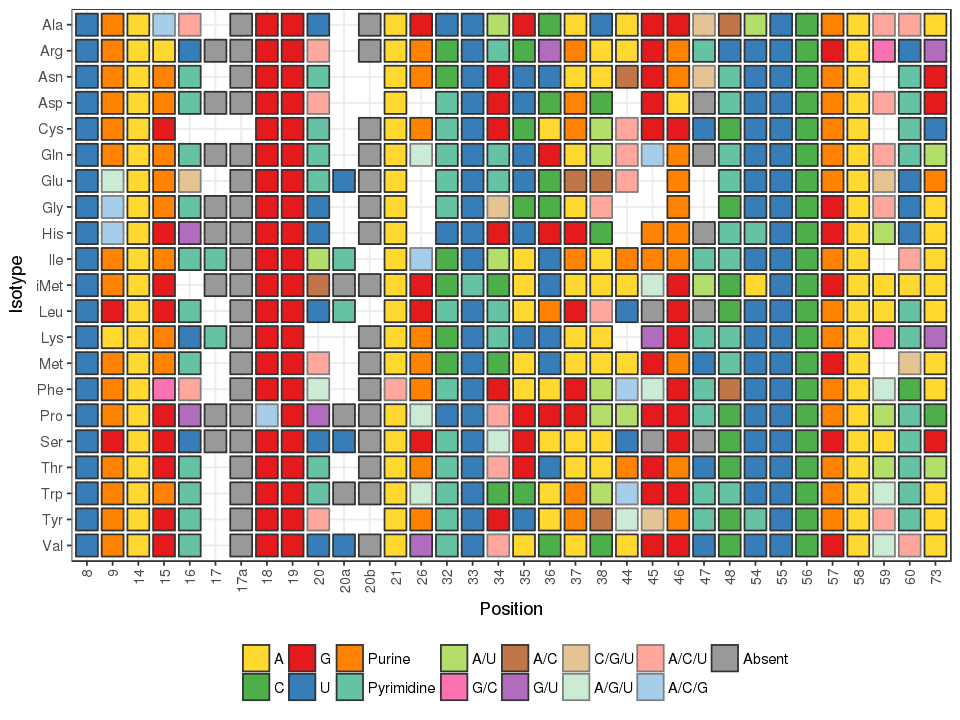

In [8]:
options(repr.plot.width=8, repr.plot.height=6)
isotype_specific %>% 
  filter(!str_detect(positions, '\\.')) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.5) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    xlab('Position') + ylab('Isotype')

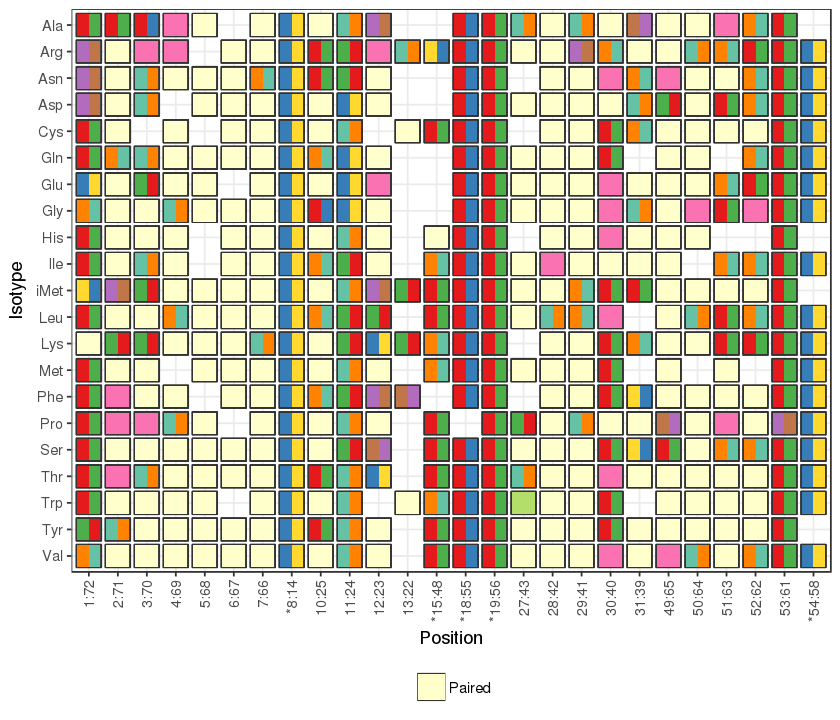

In [9]:
options(repr.plot.width=7, repr.plot.height=6)
get_5prime = Vectorize(function(identity) c("GC"="G", "AU"="A", "UA"="U", "CG"="C", "GU"="G", "UG"="U", "Absent"="Absent", "PurinePyrimidine"="Purine", "PyrimidinePurine"="Pyrimidine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Amino", "KetoAmino"="Keto", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])
get_3prime = Vectorize(function(identity) c("GC"="C", "AU"="U", "UA"="A", "CG"="G", "GU"="U", "UG"="G", "Absent"="Absent", "PurinePyrimidine"="Pyrimidine", "PyrimidinePurine"="Purine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Keto", "KetoAmino"="Amino", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])

isotype_specific %>% 
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -positions, -identity) %>%
  mutate(side=as.integer(as.factor(side))-1) %>% 
  mutate(xmin=as.integer(positions)+0.5*side-0.5+0.1*(1-side),
         xmax=as.integer(positions)+0.5*side-0.1*side,
         ymin=as.integer(isotype)-0.5+0.1,
         ymax=as.integer(isotype)+0.5-0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.5) +
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    scale_x_discrete(labels=paired_positions) +
    scale_y_discrete(limits=rev(isotypes), breaks=rev(isotypes)) +
    scale_color_manual(breaks=c("Paired", "Mismatched"), values=colors) +
    scale_fill_manual(breaks=c("Paired", "Mismatched"), values=fills) +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL), alpha=FALSE) +    
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),          
      legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

# Clade-isotype-specific heatmaps

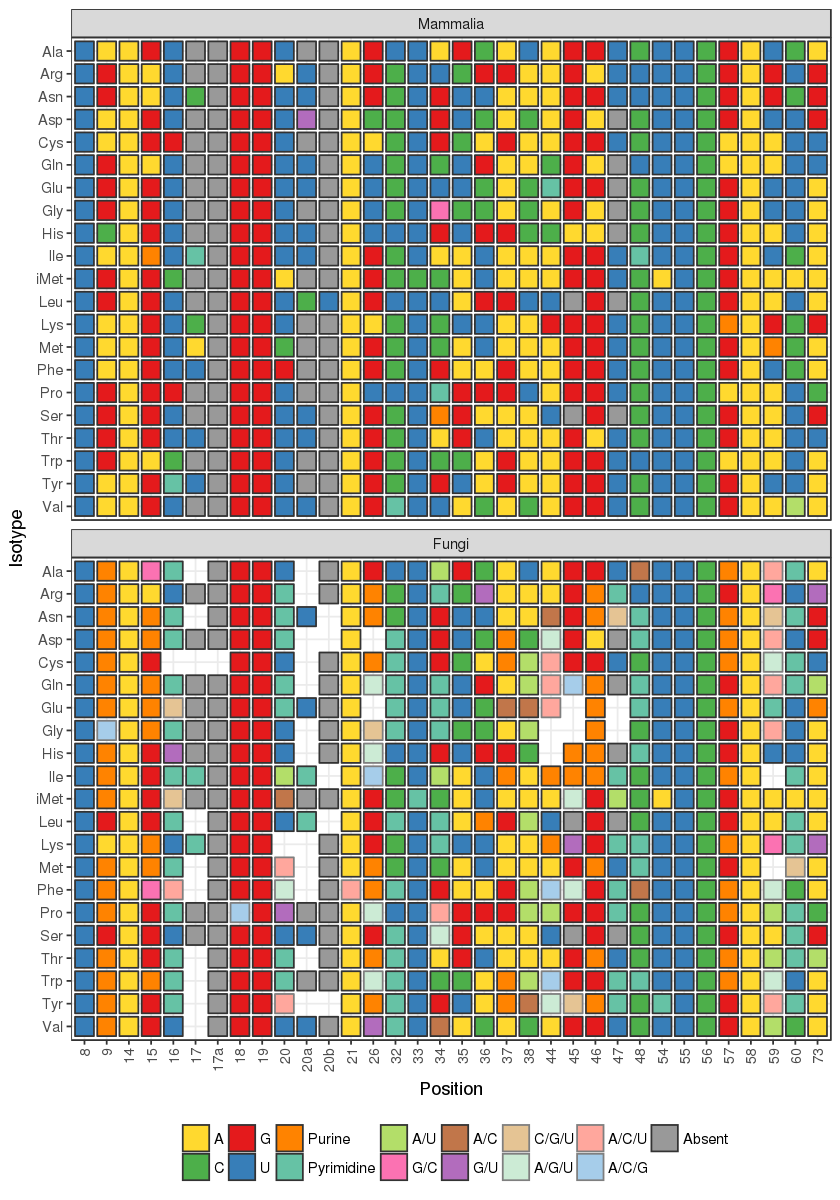

In [10]:
options(repr.plot.width=7, repr.plot.height=10)
clade_isotype_specific %>%
  filter(clade %in% c("Mammalia", "Fungi")) %>%
  filter(!(str_detect(positions, '\\.')) & positions %in% names(single_positions)) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ungroup() %>%
  mutate(clade=factor(clade, levels=c("Mammalia", "Fungi"))) %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.5) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

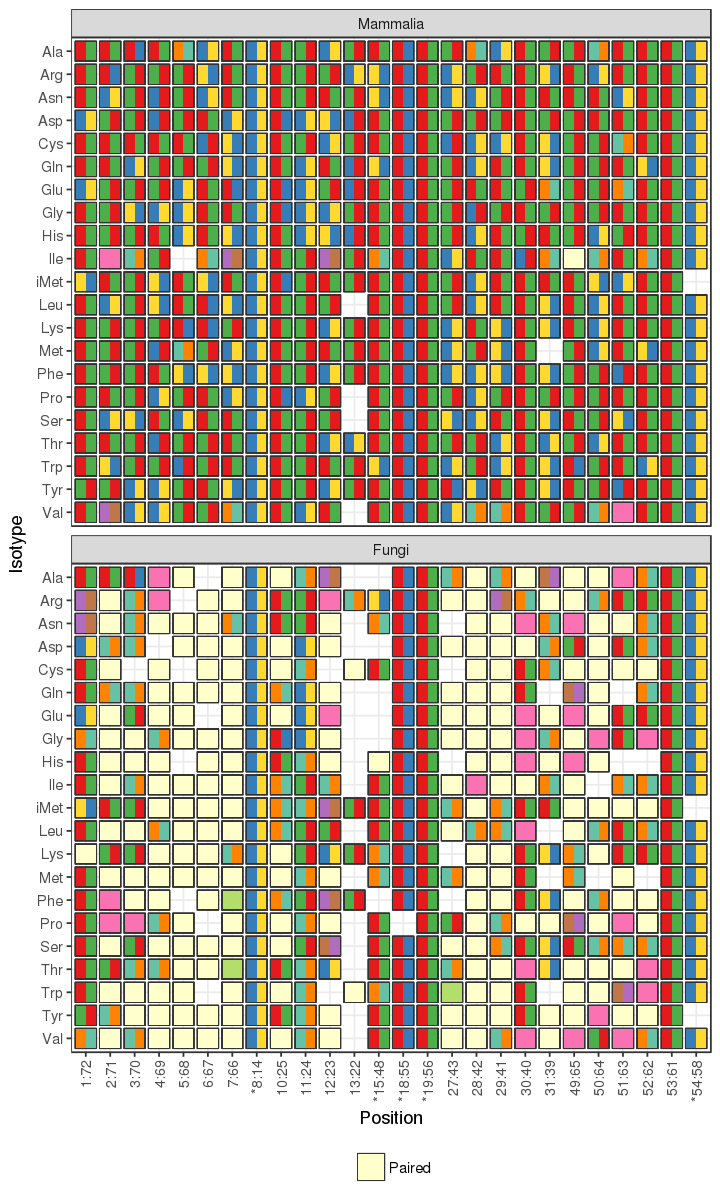

In [11]:
options(repr.plot.width=6, repr.plot.height=10)
clade_isotype_specific %>%
  filter(clade %in% c("Mammalia", "Fungi")) %>%
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(clade=factor(clade, levels=c("Mammalia", "Fungi"))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(side=as.integer(as.factor(side))-1) %>% 
  mutate(xmin=as.integer(positions)+0.5*side-0.5+0.1*(1-side),
         xmax=as.integer(positions)+0.5*side-0.1*side,
         ymin=as.integer(isotype)-0.5+0.1,
         ymax=as.integer(isotype)+0.5-0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + geom_tile(aes(x=positions, y=isotype, color=identity), width=0.85, height=0.85, size=0.5) + 
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=paired_positions) +
    scale_y_discrete(limits=rev(isotypes), breaks=rev(isotypes)) +
    scale_color_manual(breaks=c("Paired", "Mismatched"), values=colors) +
    scale_fill_manual(breaks=c("Paired", "Mismatched"), values=fills) +
    xlab('Position') + ylab('Isotype') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position="bottom") +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL), alpha=FALSE) 

# tRNA features

## Stem & loop sizes

In [466]:
stemloop = identities %>% 
  filter(quality & !(isotype %in% c("Sup", "SeC"))) %>%
  rowwise() %>%
  mutate(Astem=sum(c(X1.72 != '-:-', X2.71 != '-:-', X3.70 != '-:-', X4.69 != '-:-', X5.68 != '-:-', X6.67 != '-:-', X7.66 != '-:-')),
         Dstem=sum(c(X10.25 != '-:-', X11.24 != '-:-', X12.23 != '-:-', ifelse(isotype %in% c("Leu", "Ser", "Tyr"), FALSE, X13.22 != '-:-'))),
         Cstem=sum(c(X27.43 != '-:-', X28.42 != '-:-', X29.41 != '-:-', X30.40 != '-:-', X31.39 != '-:-')),
         Varm=V.arm + sum(c(V11.V21 != '-:-', V12.V22 != '-:-', V13.V23 != '-:-', V14.V24 != '-:-', V15.V25 != '-:-', V16.V26 != '-:-', V17.V27 != '-:-')),
         TPCstem=sum(c(X49.65 != '-:-', X50.64 != '-:-', X51.63 != '-:-', X52.62 != '-:-', X53.61 != '-:-'))) %>%
  select(isotype, Astem, Dstem, D.loop, Cstem, AC.loop, Varm, TPCstem, TPC.loop) %>%
  group_by(isotype) %>%
  summarize(Astem=mean(Astem), Dstem=mean(Dstem), Dloop=mean(D.loop), Cstem=mean(Cstem), Cloop=mean(AC.loop), TPCloop=mean(TPC.loop), TPCstem=mean(TPCstem), Varm=mean(Varm)) %>%
  gather(region, size, -isotype) %>%
  mutate(region=factor(region))

stemloop = rbind(stemloop, cbind(expand.grid(isotype=levels(stemloop$isotype), region=levels(stemloop$region)), size=0))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

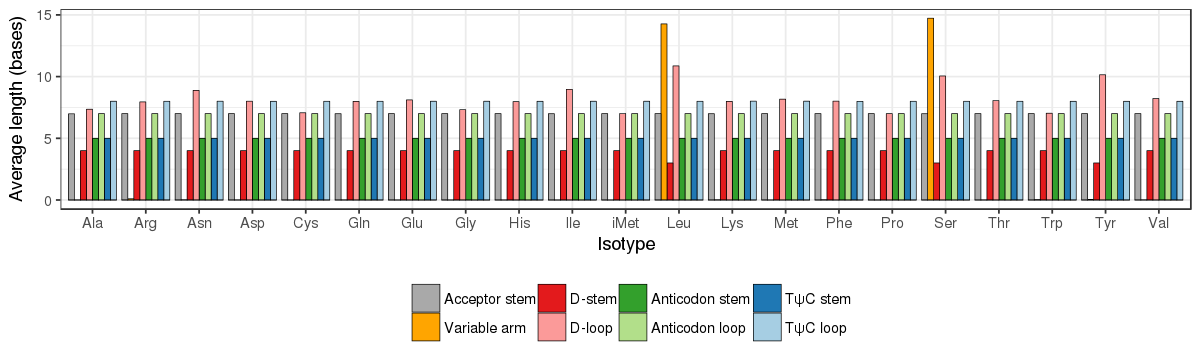

In [467]:
options(repr.plot.width=10, repr.plot.height=3)
stemloop %>% filter(!(isotype %in% c("Sup", "SeC"))) %>%
  mutate(region = revalue(region, c("Astem" = "Acceptor stem", "Varm" = "Variable arm", "Dstem" = "D-stem", "Dloop" = "D-loop", "Cstem" = "Anticodon stem", "Cloop" = "Anticodon loop", "TPCstem" = "TψC stem", "TPCloop" = "TψC loop"))) %>%
  mutate(region = factor(region, c("Acceptor stem", "Variable arm", "D-stem", "D-loop", "Anticodon stem", "Anticodon loop", "TψC stem", "TψC loop"))) %>%
  ggplot() + geom_bar(aes(x=isotype, y=size, fill=region), stat='identity', size=0.2, color='black', position='dodge') +
    scale_fill_manual(values=c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) + 
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("Average length (bases)") +
    guides(fill=guide_legend(title=NULL))

## D-loop insertions

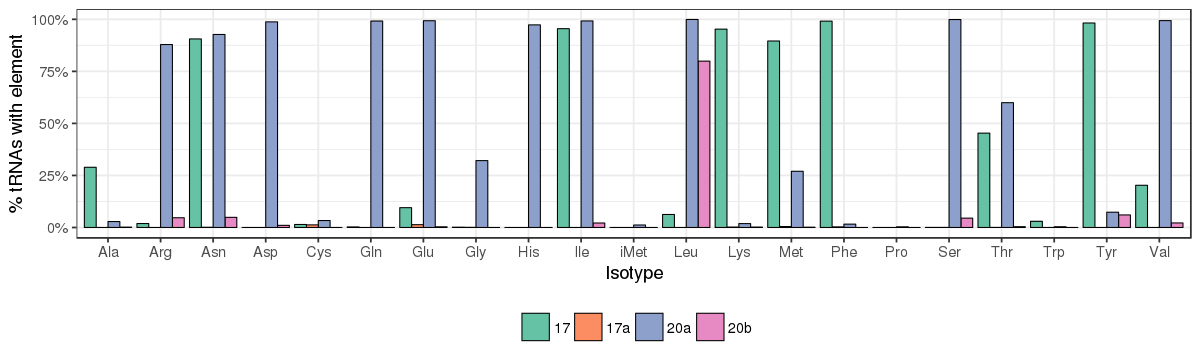

In [178]:
options(repr.plot.width=10, repr.plot.height=3)
identities %>% 
  select(quality, isotype, X17, X17a, X20a, X20b) %>%
  filter(quality) %>%
  mutate(X17=X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype) %>%
  summarize(`17`=mean(X17), `17a`=mean(X17a), `20a`=mean(X20a), `20b`=mean(X20b)) %>%
  melt(id.vars='isotype') %>%
  ggplot() + geom_bar(aes(x=isotype, y=value, fill=variable), stat='identity', color='black', size=0.3, position='dodge') +
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("% tRNAs with element") +
    guides(fill=guide_legend(title=NULL))

## 3D interactions

In [16]:
df = identities %>% 
  select(quality, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
  filter(quality) %>%
  select(-quality) %>%
  gather(positions, identity) %>%
  group_by(positions) %>%
  mutate(freq=n()) %>%
  ungroup() %>%
  group_by(positions, identity, freq) %>%
  summarize(count=n()) %>%
  mutate(freq=count/freq) %>%
  filter(freq > 0.01) %>%
  ungroup() %>%
  mutate(positions=factor(positions)) %>%
  mutate(identity=factor(identity)) %>%
  select(-count)

tertiary_interactions = rbind(df, cbind(expand.grid(positions=levels(df$positions), identity=levels(df$identity)), freq=0))

Warning message:
“attributes are not identical across measure variables; they will be dropped”

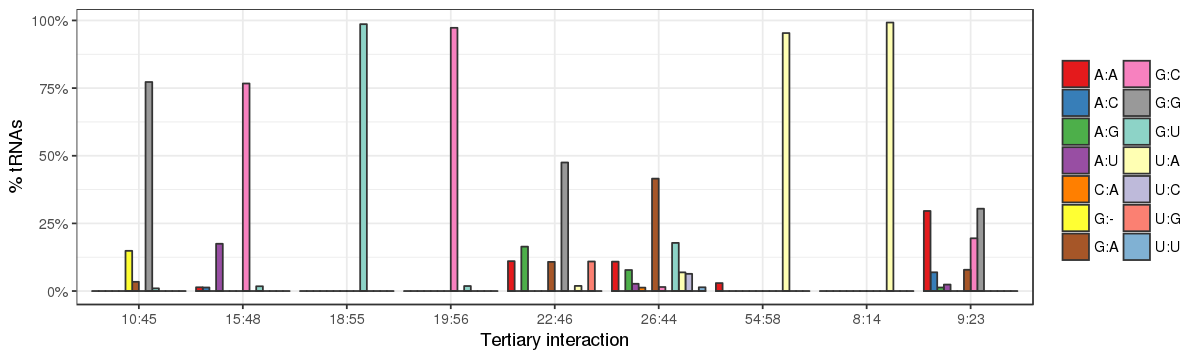

In [17]:
options(repr.plot.width=10, repr.plot.height=3)
tertiary_interactions %>% ggplot() +
  geom_bar(aes(x=positions, y=freq, fill=identity), color='gray20', position='dodge', stat='identity') +
  scale_fill_manual(values=c(brewer.pal(9, "Set1"), brewer.pal(9, "Set3"))) + 
  scale_x_discrete(labels=c("X8.14"="8:14", "X9.23"="9:23", "X10.45"="10:45", "X15.48"="15:48", "X18.55"="18:55", "X19.56"="19:56", "X22.46"="22:46", "X26.44"="26:44", "X54.58"="54:58")) + 
  scale_y_continuous(labels=percent_format()) +
  xlab("Tertiary interaction") + ylab("% tRNAs") +
  guides(fill=guide_legend(title=NULL, ncol=2))

In [18]:
tertiary_interactions = identities %>% 
  select(isotype, quality, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
  filter(quality) %>%
  rbind(identities %>%
    select(isotype, quality, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
    filter(quality) %>% 
    mutate(isotype='All')) %>%
  select(-quality) %>%
  gather(positions, identity, -isotype) %>%
  group_by(isotype, positions) %>%
  mutate(freq=n()) %>%
  ungroup() %>%
  group_by(isotype, positions, identity, freq) %>%
  summarize(count=n()) %>%
  mutate(freq=count/freq) %>%
  filter(freq > 0.05) %>%
  ungroup() %>%
  mutate(positions=factor(positions)) %>%
  mutate(identity=factor(identity, levels=c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "G:-", "U:-", "C:-"))) %>%
  select(-count)

Warning message:
“attributes are not identical across measure variables; they will be dropped”

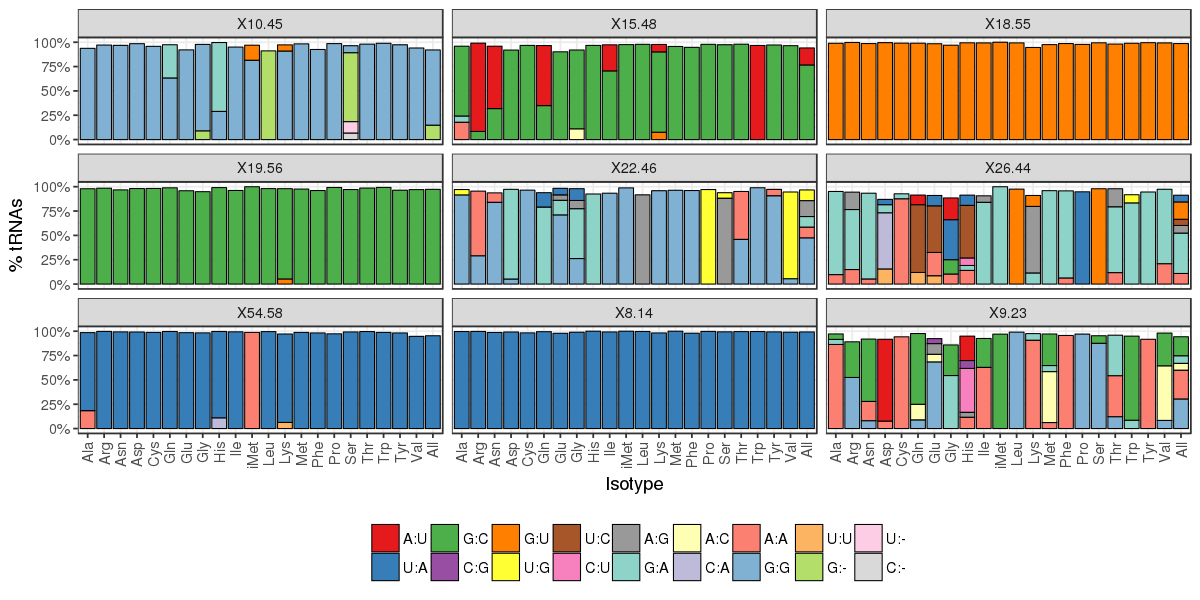

In [19]:
options(repr.plot.width=10, repr.plot.height=5)
tertiary_interactions %>% ggplot() +
  geom_bar(aes(x=isotype, y=freq, fill=identity), color='black', size=0.3, stat='identity') +
  facet_wrap(~ positions, nrow=3) +
  scale_fill_manual(values=c(brewer.pal(9, "Set1"), brewer.pal(9, "Set3"))) + 
  scale_y_continuous(labels=percent_format()) +
  xlab("Isotype") + ylab("% tRNAs") +
  theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
  guides(fill=guide_legend(title=NULL, nrow=2))

### Anticodon incidence

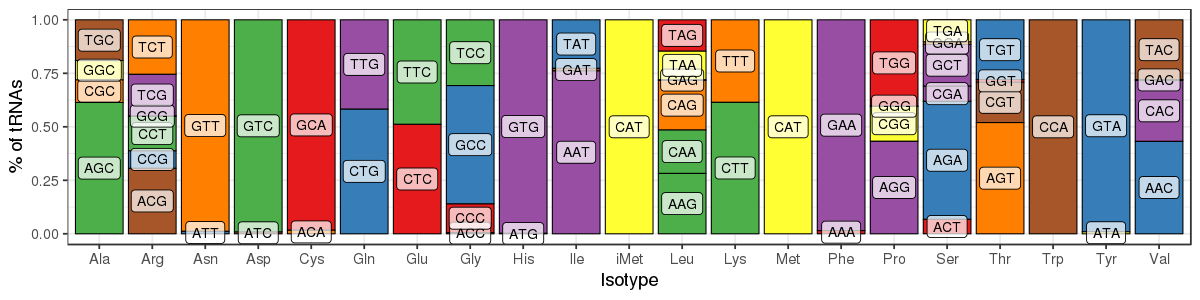

In [208]:
options(repr.plot.width=10, repr.plot.height=2.5)
identities %>% 
  filter(!(isotype %in% c("Sup", "SeC") | anticodon %in% c('SAG', 'RCT'))) %>%
  group_by(isotype, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = rep(x = brewer.pal(7, "Set1"), 10))

## A and B box motifs

Warning message:
“attributes are not identical across measure variables; they will be dropped”

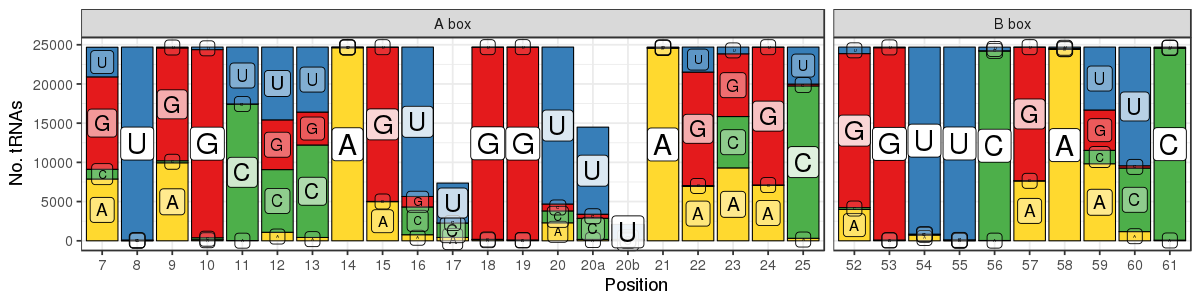

In [283]:
options(repr.plot.width=10, repr.plot.height=2.5)
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
identities %>% 
  select(quality, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  filter(quality) %>%
  gather(Position, Identity, -quality) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U")) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  ggplot() + geom_bar(aes(x = Position, y = Count, fill = Identity), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = Position, y = Count, label = Identity, size = freq, alpha = freq), position = position_stack(vjust = 0.5, reverse = FALSE)) +
    scale_x_discrete(labels = ab_positions) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    theme(legend.position='none') +
    labs(fill = '', y = 'No. tRNAs')         

In [431]:
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
df = identities %>% 
  select(quality, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  filter(quality) %>%
  gather(Position, Identity, -quality) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U")) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax))))

Warning message:
“attributes are not identical across measure variables; they will be dropped”

Warning message:
“Removed 1 rows containing missing values (geom_rect).”Warning message:
“Removed 1 rows containing missing values (geom_text).”

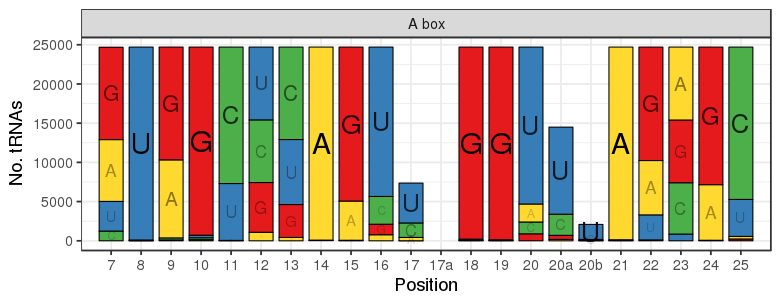

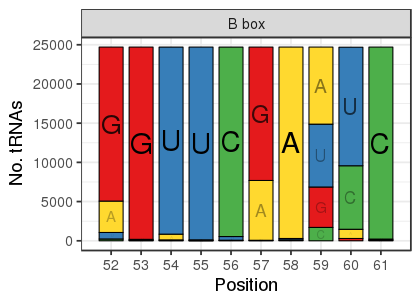

In [468]:
options(repr.plot.width=6.5, repr.plot.height=2.5)
df %>% filter(feature == "A box") %>% ungroup() %>% 
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    scale_x_discrete(limits = 1:22, labels = c('7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '22', '23', '24', '25')) +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

options(repr.plot.width=3.5, repr.plot.height=2.5)
df %>% filter(feature == "B box") %>% ungroup() %>% 
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    scale_x_discrete(limits = 23:32, labels = c('52', '53', '54', '55', '56', '57', '58', '59', '60', '61')) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

# Identity stories

## 18:55

In [107]:
identities %>% select(clade, quality, isotype, anticodon) %>%
  filter(quality & isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, anticodon) %>%
  summarize(count=n())

identities %>% select(clade, quality, isotype, X47) %>%
  filter(quality & isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, X47) %>%
  summarize(count=n()) %>%
  spread(X47, count)

identities %>% select(clade, quality, species, species_long, seqname, isotype, score, X47) %>%
  filter(quality & isotype == "Pro" & clade == "Fungi" & X47 == "-")

,clade,isotype,anticodon,count
1,Fungi,Pro,AGG,65
2,Fungi,Pro,CGG,33
3,Fungi,Pro,TGG,92


,clade,isotype,-,C,U
1,Fungi,Pro,2,53,135


,clade,quality,species,species_long,seqname,isotype,score,X47
1,Fungi,1,enceHell_ATCC50504,Encephalitozoon hellem ATCC 50504,enceHell_ATCC50504_chrX.trna2-ProCGG,Pro,60.7,-
2,Fungi,1,enceInte_ATCC50506,Encephalitozoon intestinalis ATCC 50506,enceInte_ATCC50506_chrX.trna2-ProCGG,Pro,63.4,-


## 11:24

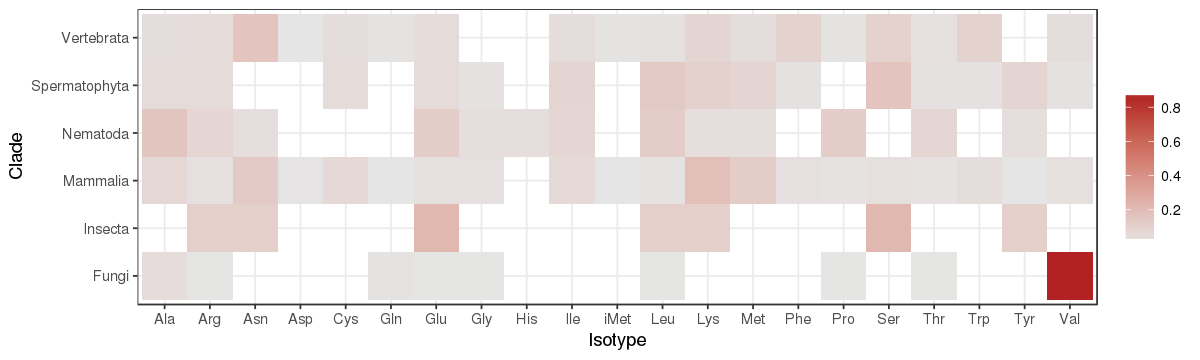

In [287]:
options(repr.plot.width=10, repr.plot.height=3)
identities %>% select(clade, quality, isotype, X11.24) %>%
  filter(quality & !(X11.24 %in% c("C:G", "U:A"))) %>%
  group_by(clade, isotype) %>%
  summarize(count = n()) %>%
  group_by(clade) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_tile(aes(x = isotype, y = clade, fill = freq)) +
    scale_fill_continuous(low = 'gray90', high = 'firebrick') +
    labs(x = 'Isotype', y = 'Clade', fill = '')

In [288]:
library(ggseqlogo)

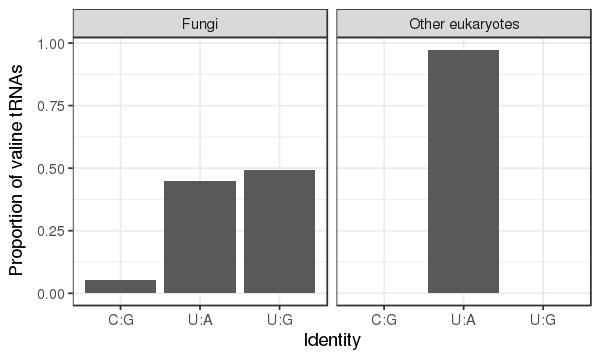

In [142]:
options(repr.plot.width=5, repr.plot.height=3)
identities %>% select(clade, quality, isotype, X11.24) %>%
  filter(isotype == "Val") %>%
  mutate(clade=ifelse(clade == "Fungi", "Fungi", "Other eukaryotes")) %>%
  group_by(clade) %>%
  mutate(total=n()) %>%
  group_by(clade, total, X11.24) %>%
  summarize(count=n()) %>%
  mutate(freq=count/total) %>%
  filter(freq >= 0.01) %>%
  ggplot() + geom_bar(aes(x = X11.24, y = freq), stat = 'identity') + 
    labs(x = 'Identity', y = 'Proportion of valine tRNAs') + facet_wrap(~ clade)